In [5]:
from manim import *

config.verbosity = "WARNING"

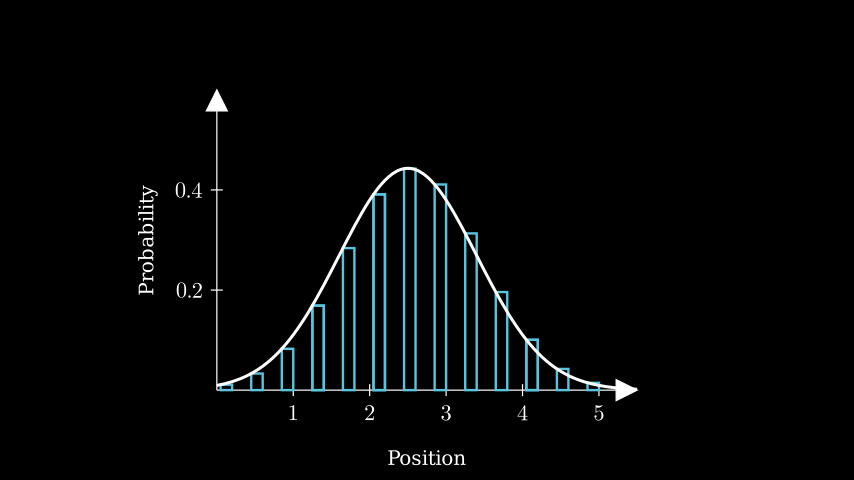

In [7]:
%%manim --quality=l -s ProbDistributionAnimation
# %%manim --quality=m ProbDistributionAnimation

from scipy.stats import norm

# Show how examples of probabilty combine to make a probability distribution
class ProbDistributionAnimation(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 5.5],
            y_range=[0, 0.6, 0.2],
            axis_config={"include_numbers": True},
            x_length=7,
            y_length=5,
        )
        x_label = ax.get_x_axis_label(
            Text("Position").scale(0.5), edge=DOWN, direction=DOWN, buff=0.5
        )
        y_label = ax.get_y_axis_label(
            Text("Probability").scale(0.5).rotate(90 * DEGREES),
            edge=LEFT,
            direction=LEFT,
            buff=0.3,
        )

        middle = 2.5
        example_boxes = []
        for x in [1.25, 4.05, 2.05]:
            start_x = x
            end_x = start_x + (0.15)
            probability = norm.pdf(start_x, loc=middle, scale=0.9)
            p = ax.coords_to_point(
                [[start_x, 0], [end_x, 0], [end_x, probability], [start_x, probability]]
            )
            r = Polygon(*p)
            example_boxes.append(r)

        x = 0.05
        all_boxes = []
        while x < 5:
            start_x = x
            end_x = start_x + (0.15)
            probability = norm.pdf(start_x, loc=middle, scale=0.9)
            p = ax.coords_to_point(
                [[start_x, 0], [end_x, 0], [end_x, probability], [start_x, probability]]
            )
            r = Polygon(*p)
            all_boxes.append(r)
            x += 0.4

        plot = ax.plot(lambda x: norm.pdf(x, loc=2.5, scale=0.9), stroke_width=5)

        # self.add(ax, x_label, y_label, g, plot)
        self.add(ax, x_label, y_label)
        for box in example_boxes:
            self.play(FadeIn(box))
        self.wait()
        self.pause(0.5)
        self.play(FadeIn(*all_boxes))
        self.wait()
        self.pause(0.5)
        self.play(DrawBorderThenFill(plot))
        self.wait()
        self.pause(5)